<a href="https://colab.research.google.com/github/MedvedevaAlina27/data_mining/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%205.%20Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №5. Random forest**

# Задание 1. Обучите классификатор Random Forest для решения задачи бинарной классификации: для каждого человека научиться предсказывать, выживет ли он при крушении Титаника.

Ссылка на датасет: https://www.kaggle.com/c/titanic/data

## 1. Устанавливаем зависимости

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## 2. Импортируем датасет

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Производим разведовательный анализ данных


Получим представление о данных в датасете:

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 4. Сформируем обучающую и тестовую выборки:


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name', 'PassengerId', 'Ticket', 'Fare'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

## 5. Feature Engineering

Поработаем с признаками, выделим важные, изменим форму их представления (при надобности)

In [12]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 96.9 MB/s eta 0:00:00


In [13]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Sex', 'Cabin', 'Embarked'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
331,1,1,45.5,0,0,1,1
733,2,1,23.0,0,0,118,1
382,3,1,32.0,0,0,118,1
704,3,1,26.0,1,0,118,1
813,3,2,6.0,4,2,118,1


In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
Age,0.316402
Sex,0.299569
Cabin,0.132163
Pclass,0.095672
SibSp,0.067671
Parch,0.044628
Embarked,0.043895


## 6. Построение базовой модели:

In [15]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

## 7. Оценка точности модели:

### 7.1. Напишите функцию, принимающую на вход аргументы y_pred, y_test и выполняющую визуализацию матрицы ошибок и отчета классификации

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def count_metrics(test, prediction):
  cm = confusion_matrix(test, prediction)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  print()
  print(classification_report(test, prediction))

### 7.2. Оцените точность модели:

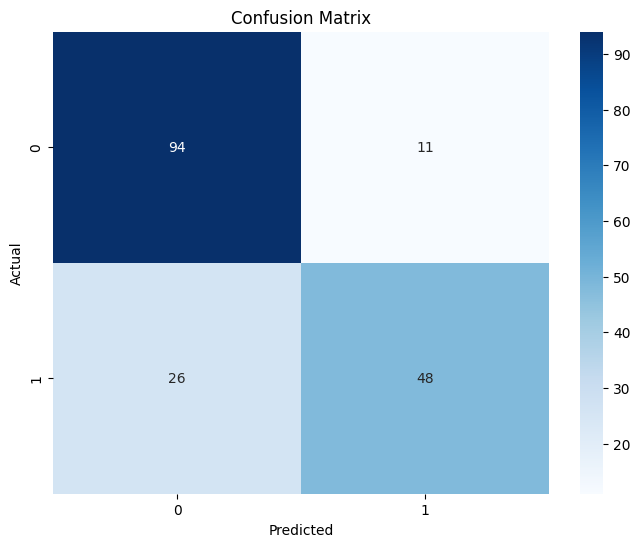


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.81      0.65      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



In [17]:
y_pred = rf.predict(X_test)

count_metrics(y_test, y_pred)

## 8. Тюнинг гиперпараметров модели:

RandomSearchCV

In [18]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=10)]
max_depth = [int(x) for x in np.linspace(1, 300, num=5)]
max_depth.append(None)
max_leaf_nodes = [int(i) for i in range(1, 500)]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

rf_clf = RandomForestClassifier(random_state=0)

rf_rand = RandomizedSearchCV(
    estimator=rf_clf,                # модель для настройки
    param_distributions=random_grid, # словарь с параметрами для случайного поиска
    n_iter=300,                      # количество итераций (случайных наборов гиперпараметров)
    scoring='accuracy',              # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    random_state=42,                 # фиксированный сид для воспроизводимости результатов
    n_jobs=-1                        # использование всех доступных ядер процессора
)

rf_rand.fit(X_train, y_train)

rf_best_params = rf_rand.best_params_
print(f"Лучшие параметры: {rf_best_params}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 31, 'max_leaf_nodes': 31, 'max_depth': 300}


GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=0)

rf_grid = GridSearchCV(
    estimator=rf_clf,                # модель для настройки
    param_grid=random_grid, # словарь с параметрами для случайного поиска
    scoring='accuracy',              # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    n_jobs=-1                        # использование всех доступных ядер процессора
)

rf_grid.fit(X_train, y_train)

rf_grid_best_params = rf_grid.best_params_
print(f"Лучшие параметры: {rf_grid_best_params}")

Fitting 5 folds for each of 29940 candidates, totalling 149700 fits
Лучшие параметры: {'max_depth': 75, 'max_leaf_nodes': 16, 'n_estimators': 94}


## 9. Оценка лучшей модели:

Оценка точности базовой модели: 0.7877


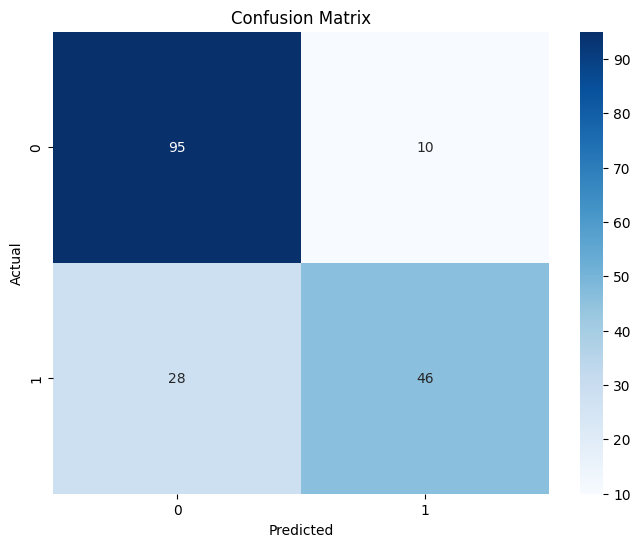


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.62      0.71        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [20]:
from sklearn.metrics import accuracy_score

rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

y_pred1 = rf1.predict(X_test)

print('Оценка точности базовой модели: {0:0.4f}'.format(accuracy_score(y_test, y_pred1)))
count_metrics(y_test, y_pred1)

Оценка точности модели при подборе параметров с помощью RandomizedSearchCV: 0.8101


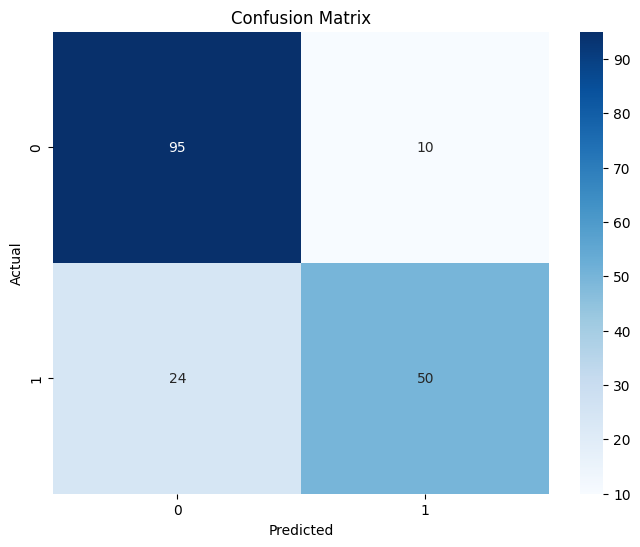


              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [21]:
rf2 = RandomForestClassifier(**rf_best_params)
rf2.fit(X_train, y_train)

y_pred2 = rf2.predict(X_test)

print('Оценка точности модели при подборе параметров с помощью RandomizedSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred2)))
count_metrics(y_test, y_pred2)

Оценка точности модели при подборе параметров с помощью GridSearchCV: 0.8156


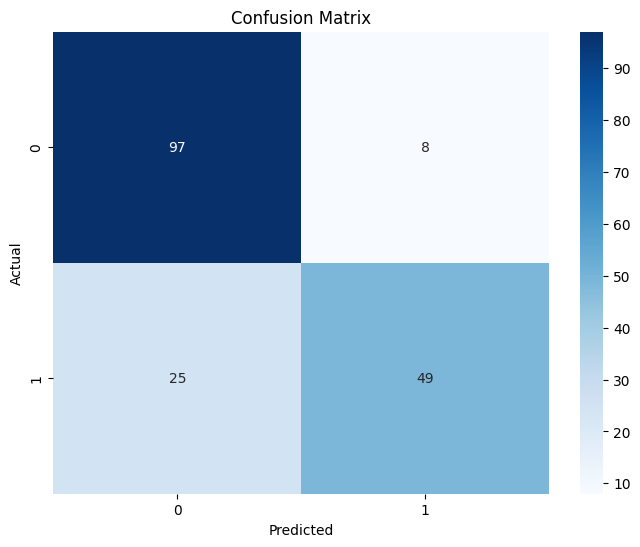


              precision    recall  f1-score   support

           0       0.80      0.92      0.85       105
           1       0.86      0.66      0.75        74

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [22]:
from sklearn.metrics import accuracy_score

rf3 = RandomForestClassifier(**rf_grid_best_params)
rf3.fit(X_train, y_train)

y_pred3 = rf3.predict(X_test)

print('Оценка точности модели при подборе параметров с помощью GridSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred3)))
count_metrics(y_test, y_pred3)

# Задание 2. Решите задачу из предыдущего пункта используя другие, ранее пройденные классификаторы. Сравните их точность предсказания с Random Forest

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree_params = {"max_depth": range(1, 300), "max_leaf_nodes": range(1, 400)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, verbose=1, n_jobs=-1)
tree_grid.fit(X_train, y_train)

print(tree_grid.best_params_)

Fitting 5 folds for each of 119301 candidates, totalling 596505 fits
{'max_depth': 20, 'max_leaf_nodes': 8}


Оценка точности дерева при подборе параметров с помощью GridSearchCV: 0.7989


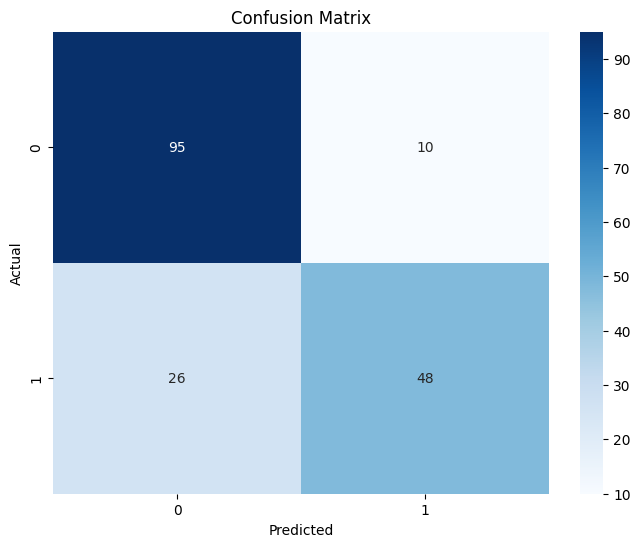


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



In [24]:
y_pred = tree_grid.predict(X_test)

print('Оценка точности дерева при подборе параметров с помощью GridSearchCV: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
count_metrics(y_test, y_pred)

# Задание 2.1*. Реализуйте функцию, для взаимодействия с обученной Вами моделью

* Функция должна принимать на вход обученную модель классификатора;

* После вызова функции, у пользователя через консоль запрашиваются значения признаков. При запросе значений нужно вывести пояснения о типе и диапазоне возможных значений. Также реализуйте обработку исключений;

* После ввода значений для всех признаков в консоль, выводится результат работы классификатора.

In [25]:
print(encoder.get_feature_names)

<bound method BaseEncoder.get_feature_names of OrdinalEncoder(cols=['Sex', 'Cabin', 'Embarked'],
               mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                         'mapping': male      1
female    2
NaN      -2
dtype: int64},
                        {'col': 'Cabin', 'data_type': dtype('O'),
                         'mapping': C124         1
B58 B60      2
B38          3
C52          4
C93          5
          ... 
D49        114
C87        115
D56        116
C62 C64    117
NaN        118
Length: 118, dtype: int64},
                        {'col': 'Embarked', 'data_type': dtype('O'),
                         'mapping': S      1
C      2
Q      3
NaN    4
dtype: int64}])>


In [26]:
y_pred = rf3.predict(X_test)

In [27]:
def predict(model):
  data = pd.DataFrame([{'Pclass': 0,	'Sex': 0, 'Age': 0,	'SibSp': 0,	'Parch': 0,
                        'Cabin': 0,	'Embarked': 0}])
  print('Введите значение \'Pclass\' (билетный класс). Возможные значения:', X_train['Pclass'].unique())
  while not 1 <= (a := int(input())) <= 3 :
    print('Введите одно из возможных значений \'Pclass\':', X_train['Pclass'].unique())
  data['Pclass'] = a
  print('Введите значение \'Sex\' (пол). Возможные значения -', X_train['Sex'].unique(),
        ', где 1 - мужчина, 2 - женщина')
  while not 1 <= (a := int(input())) <= 2 :
    print('Введите одно из возможных значений \'Sex\':', X_train['Sex'].unique())
  data['Sex'] = a
  print('Введите значение \'Age\' (возраст). Диапазон возможных значений: [2, 80]')
  while not 2 <= (a := int(input())) <= 80 :
    print('Введите значение \'Age\' из диапазона [2, 80]:')
  data['Age'] = a
  print('Введите значение \'SibSp\' (количество братьев/сестер/супругов на борту). Диапазон возможных значений: [0, 8]')
  while not 0 <= (a := int(input())) <= 8 :
    print('Введите значение \'SibSp\' из диапазона [0, 8]:')
  data['SibSp'] = a
  print('Введите значение \'Parch\' (количество родителей/детей на борту). Диапазон возможных значений: [0, 6]')
  while not 0 <= (a := int(input())) <= 6 :
    print('Введите значение \'Parch\' из диапазона [0, 6]:')
  data['Parch'] = a
#  print('Введите значение \'Fare\' (стоимость билета). Диапазон возможных значений: [0, 512]')
#  while not 0 <= (a := int(input())) <= 512 :
#    print('Введите значение \'Fare\' из диапазона [0, 512]:')
#  data['Fare'] = a
  print('Введите значение \'Cabin\' (номер каюты). Диапазон возможных значений: [1, 112]')
  while not 1 <= (a := int(input())) <= 112 :
    print('Введите значение \'Cabin\' из диапазона [1, 112]:')
  data['Cabin'] = a
  print('Введите значение \'Embarked\' (порт посадки на судно). Возможные значения -',
        X_train['Embarked'].unique(), ', где 1 - Southampton, 2 - Cherbourg, 3 - Queenstown, 4 - не установлено')
  while not 1 <= (a := int(input())) <= 4 :
    print('Введите одно из возможных значений \'Embarked\':', X_train['Embarked'].unique())
  data['Embarked'] = a
  prediction = model.predict(data)
  print()
  print('С вероятностью {0:0.4f} пассажир с заданными характеритиками:'.format(accuracy_score(y_test, y_pred)))
  print('не выжил') if prediction == 0 else print('выжил')

predict(rf3)

Введите значение 'Pclass' (билетный класс). Возможные значения: [1 2 3]
2
Введите значение 'Sex' (пол). Возможные значения - [1 2] , где 1 - мужчина, 2 - женщина
2
Введите значение 'Age' (возраст). Диапазон возможных значений: [2, 80]
23
Введите значение 'SibSp' (количество братьев/сестер/супругов на борту). Диапазон возможных значений: [0, 8]
0
Введите значение 'Parch' (количество родителей/детей на борту). Диапазон возможных значений: [0, 6]
2
Введите значение 'Cabin' (номер каюты). Диапазон возможных значений: [1, 112]
27
Введите значение 'Embarked' (порт посадки на судно). Возможные значения - [1 2 3 4] , где 1 - Southampton, 2 - Cherbourg, 3 - Queenstown, 4 - не установлено
3

С вероятностью 0.8156 пассажир с заданными характеритиками:
выжил


# Задание 3. Решите задачу регрессии, используя [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

* Для выполнения данного задания можете использовать **любой датасет**



In [74]:
df1 = pd.read_csv('/content/drive/MyDrive/Possum/possum.csv')

In [75]:
df1.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [77]:
from sklearn.model_selection import train_test_split

X = df1.drop(['case', 'age'], axis=1)
y = df1['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
def normalize(df, target):
  for i in range(len(df[target])):
    df[target][i] = (df[target][i] - df[target].min()) / (df[target].max() - df[target].min())

normalize(df1, 'age')

df1.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,0.875000,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,0.630769,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,0.641544,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,0.641544,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,0.163603,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [79]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['site',	'Pop', 'sex', 'hdlngth',	'skullw ', 'totlngth ', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

ValueError: X does not contain the columns listed in cols

In [80]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ValueError: could not convert string to float: 'other'

In [81]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

n_estimators = [int(x) for x in np.linspace(start=10, stop=250, num=10)]
max_depth = [int(x) for x in np.linspace(2, 300, num=5)]
max_depth.append(None)
max_leaf_nodes = [int(i) for i in range(2, 500)]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

rf_rgr = RandomForestRegressor(random_state=0)

rf_rand = RandomizedSearchCV(
    estimator=rf_rgr,                # модель для настройки
    param_distributions=random_grid, # словарь с параметрами для случайного поиска
    n_iter=300,                      # количество итераций (случайных наборов гиперпараметров)
    scoring='explained_variance',         # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    random_state=42,                 # фиксированный сид для воспроизводимости результатов
    n_jobs=-1                        # использование всех доступных ядер процессора
)

rf_rand.fit(X_train, y_train)

best_params = rf_rand.best_params_
print(f"Лучшие параметры: {best_params}")

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


ValueError: 
All the 1500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'other'


In [82]:
rf_grid = GridSearchCV(
    estimator=rf_rgr,                # модель для настройки
    param_grid=random_grid, # словарь с параметрами для случайного поиска
    scoring='explained_variance',              # метрика для оценки качества моделей
    cv=5,                            # количество фолдов для кросс-валидации
    verbose=1,                       # уровень детализации вывода
    n_jobs=-1                        # использование всех доступных ядер процессора
)

rf_grid.fit(X_train, y_train)

grid_best_params = rf_grid.best_params_
print(f"Лучшие параметры: {grid_best_params}")

Fitting 5 folds for each of 29880 candidates, totalling 149400 fits


ValueError: 
All the 149400 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
149400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'other'


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

def calculate_metrics(model):
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  mse_train = mean_squared_error(y_train, pred_train)
  mse_test = mean_squared_error(y_test, pred_test)
  r2_train = r2_score(y_train, pred_train)
  r2_test = r2_score(y_test, pred_test)

  print('Оценки точности RF Regressor:', end = '\n\n\n')
  print(f'MSE на обучении - {mse_train:.2f}')
  print(f'MSE на тесте - {mse_test:.2f}', end = '\n\n')
  print(f'R² на обучении - {r2_train:.2f}')
  print(f'R² на тесте - {r2_test:.2f}', end = '\n\n')

In [ ]:
calculate_metrics(rf_rand)

In [ ]:
calculate_metrics(rf_grid)

In [ ]:
rf = RandomForestRegressor(
    n_estimators = 200,
    max_depth=20,
    max_leaf_nodes=None,
    n_jobs = -1
  )

rf.fit(X_train, y_train)

calculate_metrics(rf)